# Exploring and Processing Data

In [1]:
# imports
import pandas as pd
import numpy as np
import os

## Import Data

In [2]:
# set path to raw data
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
data_file_path = os.path.join(raw_data_path, 'APPENC05.txt')

In [3]:
# read the default .txt file and print it
f = open(data_file_path, 'r')
print(f.read(500)) # print the first 500 characters
f.close()

   1     0.651    0.5599    15.959    50    0.0000    0    0.0000    6
   2     0.852    0.3716    27.660    58    0.0000    0    0.0000    7
   3     0.852    0.6005    14.732    74    0.0000    0    0.0000    7
   4     0.852    0.3012    26.576    58    0.0000    0    0.0000    6
   5     1.448    2.1170    30.877    62    0.0000    0    0.0000    6
   6     2.160    0.3499    25.280    50    0.0000    0    0.0000    6
   7     2.160    2.0959    32.137    64    1.8589    0    0.0000    6
   


In [4]:
# create pandas dataframe with column headers
cols = [
    'Obs', 'PSALevel','CancerVol', 'Weight',
    'Age', 'BenignProstaticHyperplasia', 'SeminalVesicleInvasion',
    'CapsularPenetration', 'GleasonScore'
    ]

df = pd.read_fwf(data_file_path, names=cols, index_col='Obs')

## Basic Structure

In [5]:
# creating a new binary response variable Y, called high-grade cancer, by letting Y=1 if Gleason score equals 8, 
# and Y=0 otherwise (i.e., if Gleason score equals 6 or 7)

df['Y_HighGradeCancer'] = np.where(df['GleasonScore'] == 8, 1, 0)

In [6]:
# use .head() to view the first 5 rows
df.head()

,PSALevel,CancerVol,Weight,Age,BenignProstaticHyperplasia,SeminalVesicleInvasion,CapsularPenetration,GleasonScore,Y_HighGradeCancer
Obs,,,,,,,,,
1,0.651,0.5599,15.959,50,0.0,0,0.0,6,0
2,0.852,0.3716,27.660,58,0.0,0,0.0,7,0
3,0.852,0.6005,14.732,74,0.0,0,0.0,7,0
4,0.852,0.3012,26.576,58,0.0,0,0.0,6,0
5,1.448,2.1170,30.877,62,0.0,0,0.0,6,0


In [7]:
# use .tail() to view the last 5 rows
df.tail()

,PSALevel,CancerVol,Weight,Age,BenignProstaticHyperplasia,SeminalVesicleInvasion,CapsularPenetration,GleasonScore,Y_HighGradeCancer
Obs,,,,,,,,,
93,80.640,16.9455,48.424,68,0.0000,1,3.7434,8,1
94,107.770,45.6042,49.402,44,0.0000,1,8.7583,8,1
95,170.716,18.3568,29.964,52,0.0000,1,11.7048,8,1
96,239.847,17.8143,43.380,68,4.7588,1,4.7588,8,1
97,265.072,32.1367,52.985,68,1.5527,1,18.1741,8,1


In [8]:
# use .info() to get basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 1 to 97
Data columns (total 9 columns):
PSALevel                      97 non-null float64
CancerVol                     97 non-null float64
Weight                        97 non-null float64
Age                           97 non-null int64
BenignProstaticHyperplasia    97 non-null float64
SeminalVesicleInvasion        97 non-null int64
CapsularPenetration           97 non-null float64
GleasonScore                  97 non-null int64
Y_HighGradeCancer             97 non-null int32
dtypes: float64(5), int32(1), int64(3)
memory usage: 7.2 KB


In [11]:
# filter rows based on condition
gleason_8 = len(df.loc[df.GleasonScore == 8, :])
gleason_not8 = len(df.loc[df.GleasonScore != 8, :])
print(f'Count of high-grade cancer: {gleason_eight}')
print(f'Count of non high-grade cancer: {gleason_not_eight}')

Count of high-grade cancer: 21
Count of non high-grade cancer: 76


## Summary Statistics

In [12]:
# use .describe() to view summary statistics for all numerical columns
df.describe()

,PSALevel,CancerVol,Weight,Age,BenignProstaticHyperplasia,SeminalVesicleInvasion,CapsularPenetration,GleasonScore,Y_HighGradeCancer
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,23.730134,6.998682,45.491361,63.865979,2.534725,0.216495,2.245367,6.876289,0.216495
std,40.782925,7.880869,45.705053,7.445117,3.031176,0.413995,3.783329,0.739619,0.413995
min,0.651000,0.259200,10.697000,41.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,5.641000,1.665300,29.371000,60.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,13.330000,4.263100,37.338000,65.000000,1.349900,0.000000,0.449300,7.000000,0.000000
75%,21.328000,8.414900,48.424000,68.000000,4.758800,0.000000,3.254400,7.000000,0.000000
max,265.072000,45.604200,450.339000,79.000000,10.277900,1.000000,18.174100,8.000000,1.000000


In [13]:
# correlation matrix
df.corr()

,PSALevel,CancerVol,Weight,Age,BenignProstaticHyperplasia,SeminalVesicleInvasion,CapsularPenetration,GleasonScore,Y_HighGradeCancer
PSALevel,1.000000,0.624151,0.026213,0.017199,-0.016486,0.528619,0.550793,0.429580,0.497189
CancerVol,0.624151,1.000000,0.005107,0.039094,-0.133209,0.581742,0.692897,0.481438,0.564645
Weight,0.026213,0.005107,1.000000,0.164324,0.321849,-0.002410,0.001579,-0.024207,0.039445
Age,0.017199,0.039094,0.164324,1.000000,0.366341,0.117658,0.099555,0.225852,0.148074
BenignProstaticHyperplasia,-0.016486,-0.133209,0.321849,0.366341,1.000000,-0.119553,-0.083009,0.026826,-0.058032
SeminalVesicleInvasion,0.528619,0.581742,-0.002410,0.117658,-0.119553,1.000000,0.680284,0.428573,0.392231
CapsularPenetration,0.550793,0.692897,0.001579,0.099555,-0.083009,0.680284,1.000000,0.461566,0.463134
GleasonScore,0.429580,0.481438,-0.024207,0.225852,0.026826,0.428573,0.461566,1.000000,0.802786
Y_HighGradeCancer,0.497189,0.564645,0.039445,0.148074,-0.058032,0.392231,0.463134,0.802786,1.000000


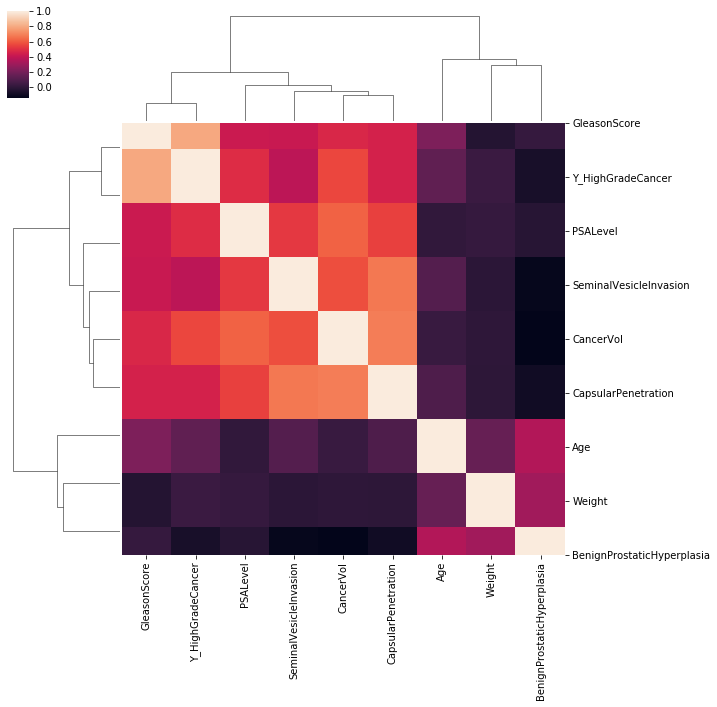

In [11]:
import seaborn as sns

sns.clustermap(df.corr());

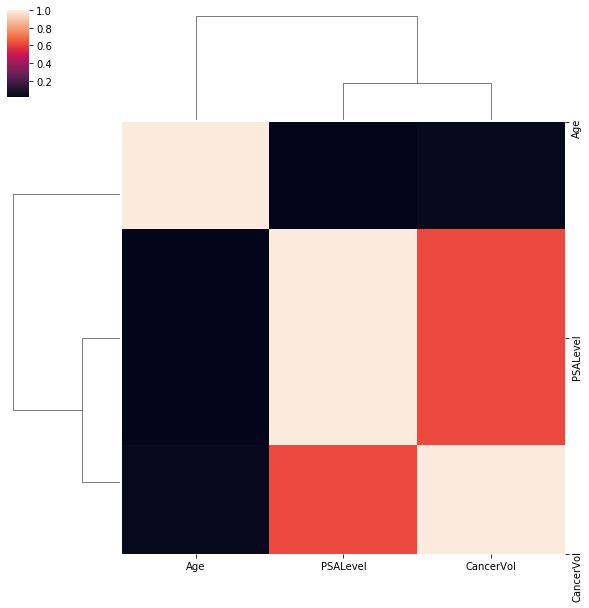

In [17]:
# view a few terms more closely
sns.clustermap(df[['PSALevel', 'CancerVol', 'Age']].corr());

In [11]:
# numerical features
# centrality measures
print(f'Mean Age: {round(df.Age.mean(), 2)}')
print(f'Median Age: {df.Age.median()}')

Mean Age: 63.87
Median Age: 65.0


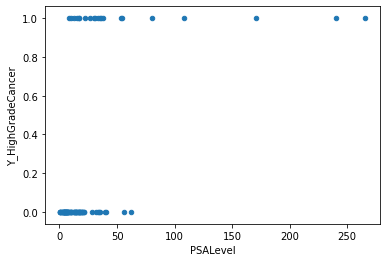

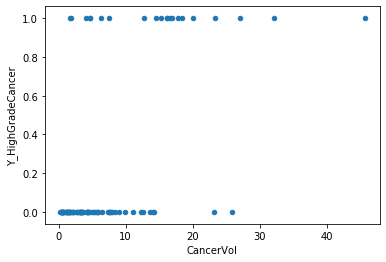

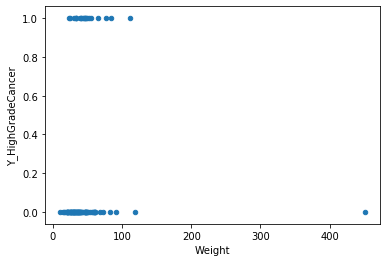

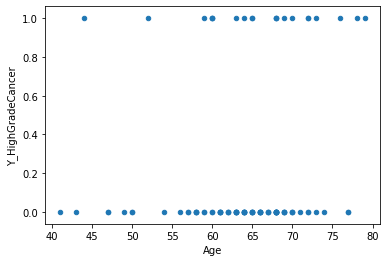

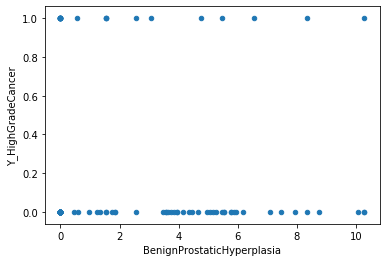

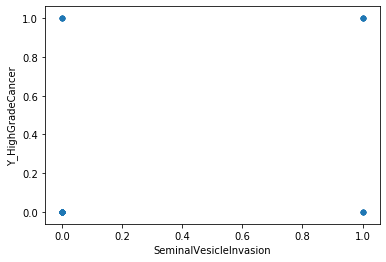

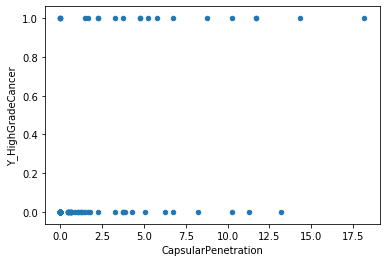

In [71]:
# print all relevant scatter plots; examine visuals for outliers
cols = [column for column in df.columns if column not in ['Y_HighGradeCancer', 'GleasonScore']]
for col in cols:
    df[['Y_HighGradeCancer', col]].plot.scatter(x=col, y='Y_HighGradeCancer');

## Distributions

In [16]:
%matplotlib inline

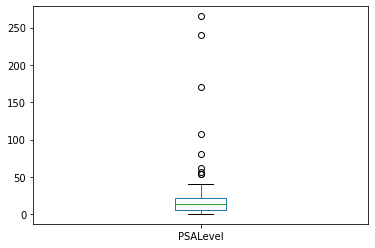

In [27]:
# box-whisker plot
df.PSALevel.plot(kind='box');

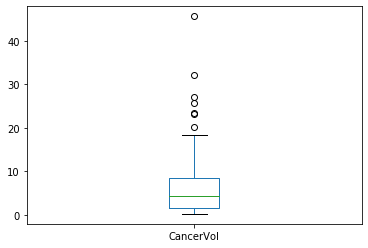

In [29]:
df.CancerVol.plot(kind='box');

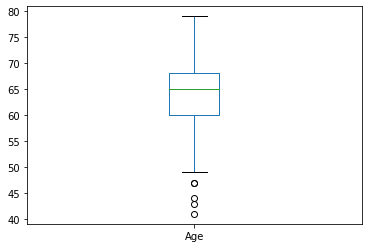

In [28]:
df.Age.plot(kind='box');

In [169]:
# Y binary column: proportions
df.Y_HighGradeCancer.value_counts(normalize=True)

0    0.783505
1    0.216495
Name: Y_HighGradeCancer, dtype: float64

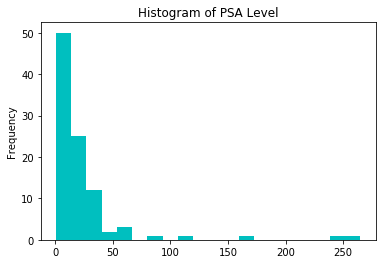

In [76]:
# use hist to create histogram
df.PSALevel.plot(kind='hist', title='Histogram of PSA Level', color='c', bins=20);

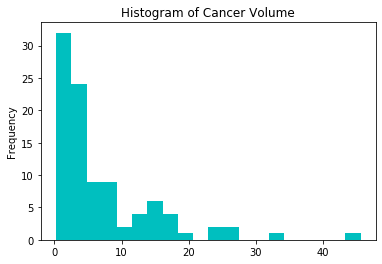

In [77]:
df.CancerVol.plot(kind='hist', title='Histogram of Cancer Volume', color='c', bins=20);

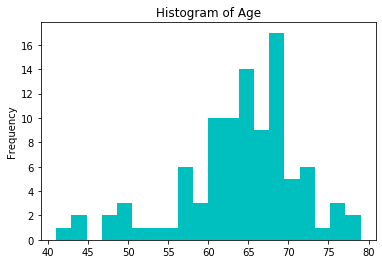

In [78]:
df.Age.plot(kind='hist', title='Histogram of Age', color='c', bins=20);

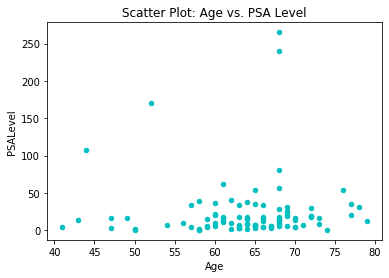

In [27]:
# use scatter plot for bi-variate distribution
df.plot.scatter(x='Age', y='PSALevel', color='c', title='Scatter Plot: Age vs. PSA Level');

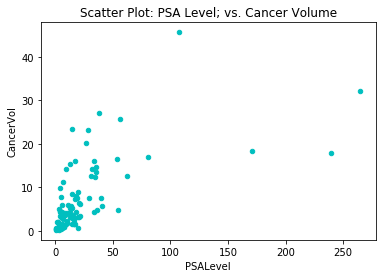

In [28]:
# use scatter plot for bi-variate distribution
df.plot.scatter(x='PSALevel', y='CancerVol', color='c', title='Scatter Plot: PSA Level; vs. Cancer Volume');

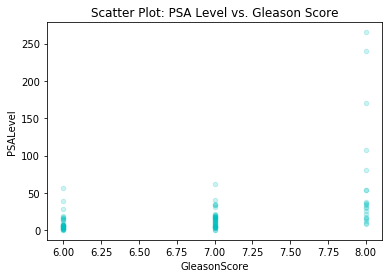

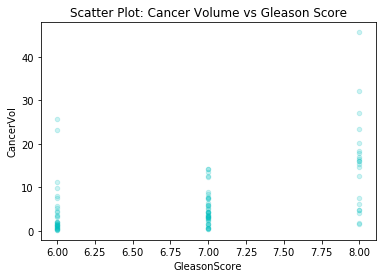

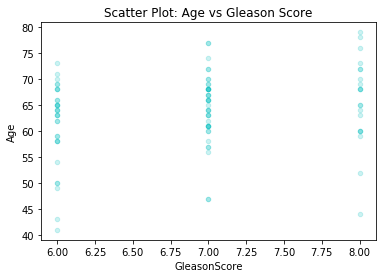

In [31]:
# use scatter plot for bi-variate distribution
df.plot.scatter(x='GleasonScore', y='PSALevel', color='c', alpha=0.2, title='Scatter Plot: PSA Level vs. Gleason Score');
df.plot.scatter(x='GleasonScore', y='CancerVol', color='c', alpha=0.2, title='Scatter Plot: Cancer Volume vs Gleason Score');
df.plot.scatter(x='GleasonScore', y='Age', color='c', alpha=0.2, title='Scatter Plot: Age vs Gleason Score');

In [167]:
# calculate skewness for all columns in dataframe
for label, content in df.items():
    print(f'The skewness of {label} is: {round(content.skew(), 2)}')

The skewness of PSALevel is: 4.39
The skewness of CancerVol is: 2.18
The skewness of Weight is: 7.46
The skewness of Age is: -0.83
The skewness of BenignProstaticHyperlasia is: 0.98
The skewness of SeminalVesicleInvasion is: 1.4
The skewness of CapsularPenetration is: 2.13
The skewness of GleasonScore is: 0.2
The skewness of Y_HighGradeCancer is: 1.4


## Grouping and Aggregations

## Crosstabs

## Working With Outliers

### PSA Level

In [32]:
# calculate IQR and find upper outlier fence

PSALevel_Q1 = np.percentile(df.PSALevel, 25)
PSALevel_Q2 = np.percentile(df.PSALevel, 50)
PSALevel_Q3 = np.percentile(df.PSALevel, 75)
PSALevel_IQR = PSALevel_Q3 - PSALevel_Q1  # inner quartile range
PSALevel_upper_fence = PSALevel_Q3 + 1.5 * PSALevel_IQR
print(f'The upper boundry for outliers in PSALevel is: {round(PSALevel_upper_fence, 2)}')

df.loc[df.PSALevel > PSALevel_upper_fence]

The upper boundry for outliers in PSALevel is: 44.86


,PSALevel,CancerVol,Weight,Age,BenignProstaticHyperplasia,SeminalVesicleInvasion,CapsularPenetration,GleasonScore,Y_HighGradeCancer
Obs,,,,,,,,,
89,53.517,16.6099,112.168,65,0.0000,1,11.7048,8,1
90,54.055,4.7588,40.447,76,2.5600,1,2.2479,8,1
91,56.261,25.7903,60.340,68,0.0000,0,0.0000,6,0
92,62.178,12.5535,39.646,61,3.8574,1,0.0000,7,0
93,80.640,16.9455,48.424,68,0.0000,1,3.7434,8,1
94,107.770,45.6042,49.402,44,0.0000,1,8.7583,8,1
95,170.716,18.3568,29.964,52,0.0000,1,11.7048,8,1
96,239.847,17.8143,43.380,68,4.7588,1,4.7588,8,1
97,265.072,32.1367,52.985,68,1.5527,1,18.1741,8,1


### Cancer Volume

In [34]:
# calculate IQR and find upper outlier fences where Y_HighGradeCancer == 0

CancerVol_Q1 = np.percentile(df.loc[df.Y_HighGradeCancer == 0]['CancerVol'], 25)
CancerVol_Q2 = np.percentile(df.loc[df.Y_HighGradeCancer == 0]['CancerVol'], 50)
CancerVol_Q3 = np.percentile(df.loc[df.Y_HighGradeCancer == 0]['CancerVol'], 75)
CancerVol_IQR = CancerVol_Q3 - CancerVol_Q1  # inner quartile range
CancerVol_mild_upper_fence = CancerVol_Q3 + 1.5 * CancerVol_IQR
CancerVol_extreme_upper_fence = CancerVol_Q3 + 2.0 * CancerVol_IQR
print(f'The upper boundry for mild outliers in CancerVol is: {round(CancerVol_mild_upper_fence, 2)}')
print(f'The upper boundry for extreme outliers in CancerVol is: {round(CancerVol_extreme_upper_fence, 2)}')

df.loc[(df.CancerVol > CancerVol_extreme_upper_fence) & (df.Y_HighGradeCancer ==0) ]

The upper boundry for mild outliers in CancerVol is: 12.55
The upper boundry for extreme outliers in CancerVol is: 14.77


,PSALevel,CancerVol,Weight,Age,BenignProstaticHyperplasia,SeminalVesicleInvasion,CapsularPenetration,GleasonScore,Y_HighGradeCancer
Obs,,,,,,,,,
76,28.219,23.1039,26.05,68,0.9512,1,11.2459,6,0
91,56.261,25.7903,60.34,68,0.0000,0,0.0000,6,0


### Age

In [149]:
# calculate IQR and find lower outlier fence

Age_Q1 = np.percentile(df.Age, 25)
Age_Q2 = np.percentile(df.Age, 50)
Age_Q3 = np.percentile(df.Age, 75)
Age_IQR = Age_Q3 - Age_Q1 # inner quartile range
Age_lower_fence = Age_Q1 -  1.5 * Age_IQR
print(f'The lower boundry for outliers in Age is: {Age_lower_fence}')

df.loc[df.Age < Age_lower_fence]

The lower boundry for outliers in Age is: 48.0


,PSALevel,CancerVol,Weight,Age,BenignProstaticHyperlasia,SeminalVesicleInvasion,CapsularPenetration,GleasonScore,Y_HighGradeCancer
Obs,,,,,,,,,
9,2.858,0.4584,34.467,47,0.0,0,0.0000,7,0
19,4.759,0.5712,26.311,41,0.0,0,0.0000,6,0
49,13.330,5.7546,33.115,43,0.0,0,0.0000,6,0
57,16.281,2.6379,17.637,47,0.0,0,1.6487,7,0
94,107.770,45.6042,49.402,44,0.0,1,8.7583,8,1


In [60]:
# try transformations to reduce skewness
log_PSALevel = np.log(df.PSALevel)

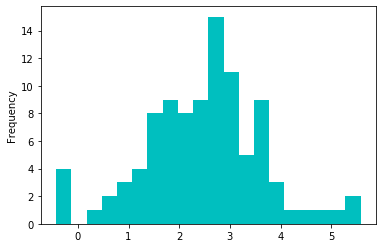

In [61]:
# histogram of log CancerVol
log_PSALevel.plot(kind='hist', bins=20, color='c');

In [70]:
print(df.PSALevel.skew())
print(log_PSALevel.skew())
print(df.CancerVol.skew())
print(df.Age.skew())

4.385360830605506
0.00025004320819669836
2.179051607320379
-0.8284755114218996


## Drop, Modify, and Reorder Columns

In [46]:
# remove GleasonScore from dataset and store to new "df_trimmed" dataframe
df_trimmed = df.drop(columns=['GleasonScore'], axis=1)

In [47]:
# reorder columns
columns = [column for column in df_trimmed.columns if column != 'Y_HighGradeCancer']
columns = ['Y_HighGradeCancer'] + columns
df_trimmed = df_trimmed[columns]
df_trimmed.head()

,Y_HighGradeCancer,PSALevel,CancerVol,Weight,Age,BenignProstaticHyperplasia,SeminalVesicleInvasion,CapsularPenetration
Obs,,,,,,,,
1,0,0.651,0.5599,15.959,50,0.0,0,0.0
2,0,0.852,0.3716,27.660,58,0.0,0,0.0
3,0,0.852,0.6005,14.732,74,0.0,0,0.0
4,0,0.852,0.3012,26.576,58,0.0,0,0.0
5,0,1.448,2.1170,30.877,62,0.0,0,0.0


In [48]:
df_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 1 to 97
Data columns (total 8 columns):
Y_HighGradeCancer             97 non-null int32
PSALevel                      97 non-null float64
CancerVol                     97 non-null float64
Weight                        97 non-null float64
Age                           97 non-null int64
BenignProstaticHyperplasia    97 non-null float64
SeminalVesicleInvasion        97 non-null int64
CapsularPenetration           97 non-null float64
dtypes: float64(5), int32(1), int64(2)
memory usage: 8.9 KB


## Standardize DataFrame

In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [107]:
# select columns which need to be standardized
# do not inclue Y_HighGradeCancer or SeminalVesicleInvasion (categorical variables)
cols=['PSALevel', 'CancerVol', 'Weight', 'Age', 'BenignProstaticHyperplasia', 'CapsularPenetration']

In [108]:
# make a copy of dataframe
df_stand = df_trimmed.copy()

In [109]:
df_stand['PSALevel'] = np.log(df_stand.PSALevel)
df_stand['CancerVol'] = np.log(df_stand.CancerVol)

In [110]:
df_stand[cols] = scaler.fit_transform(df_stand[cols])

In [111]:
# the standardized features should now have mean=0 and sd=1
df_stand.describe()

,Y_HighGradeCancer,PSALevel,CancerVol,Weight,Age,BenignProstaticHyperplasia,SeminalVesicleInvasion,CapsularPenetration
count,97.000000,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,97.000000,9.700000e+01
mean,0.216495,7.783007e-17,-2.403576e-16,2.163218e-16,3.433679e-16,6.409535e-17,0.216495,1.281907e-16
std,0.413995,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,0.413995,1.005195e+00
min,0.000000,-2.533700e+00,-2.302583e+00,-7.652351e-01,-3.087227e+00,-8.405624e-01,0.000000,-5.965729e-01
25%,0.000000,-6.522705e-01,-7.161288e-01,-3.545364e-01,-5.219612e-01,-8.405624e-01,0.000000,-5.965729e-01
50%,0.000000,9.701907e-02,8.555117e-02,-1.793175e-01,1.531086e-01,-3.929102e-01,0.000000,-4.771981e-01
75%,0.000000,5.065387e-01,6.655015e-01,6.449776e-02,5.581506e-01,7.375452e-01,0.000000,2.680906e-01
max,1.000000,2.702227e+00,2.106830e+00,8.903846e+00,2.043304e+00,2.567782e+00,1.000000,4.232114e+00


In [112]:
### calculate skewness for all columns in trimmed dataframe
for label, content in df_stand.items():
    print(f'The skewness of {label} is: {round(content.skew(), 2)}')

The skewness of Y_HighGradeCancer is: 1.4
The skewness of PSALevel is: 0.0
The skewness of CancerVol is: -0.25
The skewness of Weight is: 7.46
The skewness of Age is: -0.83
The skewness of BenignProstaticHyperplasia is: 0.98
The skewness of SeminalVesicleInvasion is: 1.4
The skewness of CapsularPenetration is: 2.13


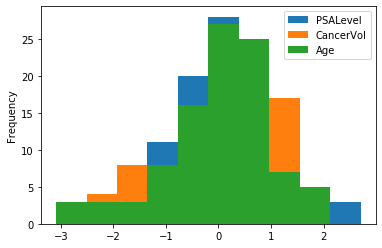

In [126]:
df_stand[['PSALevel', 'CancerVol', 'Age']].plot(kind='hist');

## Save Processed Data

In [120]:
# define paths
processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
write_data_path = os.path.join(processed_data_path, 'APPENC05_log.txt')

In [121]:
# save data
df_stand.to_csv(write_data_path)

## Advanced Visualizations Using Matplotlib

In [117]:
import matplotlib.pyplot as plt